Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [7]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import ast

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [202]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv("movies.csv")
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [203]:
movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'], inplace=True, axis=1)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows, sort by first name and display results

In [204]:
movies_df.sort_values("title", inplace=True)

movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
4257,1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",301325,2.815228,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-11-20,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",#Horror,3.3,52
3339,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",19913,45.610993,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-07-17,60722734,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",(500) Days of Summer,7.2,2904
3556,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",333371,53.698683,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-10,108286421,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10 Cloverfield Lane,6.8,2468
2903,1200000,"[{""id"": 18, ""name"": ""Drama""}]",345003,0.489271,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-11-20,0,111.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10 Days in a Madhouse,4.3,5
2739,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",4951,54.550275,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-03-30,53478166,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",10 Things I Hate About You,7.3,1701
...,...,...,...,...,...,...,...,...,...,...,...,...
3524,5600000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",10664,22.341462,"[{""iso_3166_1"": ""ES"", ""name"": ""Spain""}]",2009-09-15,18469680,85.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",[REC]²,6.4,489
2084,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",1946,21.928025,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",1999-04-14,2856712,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",eXistenZ,6.7,475
568,70000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7451,46.217769,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-08-09,277448382,124.0,"[{""iso_639_1"": ""cs"", ""name"": ""\u010cesk\u00fd""...",xXx,5.8,1424
767,60000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",11679,36.689223,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-04-27,71073932,101.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",xXx: State of the Union,4.7,549


#### Now sorted by title drop duplicates and display updated data results

In [205]:
movies_df.drop_duplicates(subset="title",
                     keep=False, inplace=True)

movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
4257,1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",301325,2.815228,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-11-20,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",#Horror,3.3,52
3339,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",19913,45.610993,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-07-17,60722734,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",(500) Days of Summer,7.2,2904
3556,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",333371,53.698683,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-10,108286421,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10 Cloverfield Lane,6.8,2468
2903,1200000,"[{""id"": 18, ""name"": ""Drama""}]",345003,0.489271,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-11-20,0,111.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10 Days in a Madhouse,4.3,5
2739,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",4951,54.550275,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-03-30,53478166,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",10 Things I Hate About You,7.3,1701
...,...,...,...,...,...,...,...,...,...,...,...,...
3524,5600000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",10664,22.341462,"[{""iso_3166_1"": ""ES"", ""name"": ""Spain""}]",2009-09-15,18469680,85.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",[REC]²,6.4,489
2084,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",1946,21.928025,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",1999-04-14,2856712,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",eXistenZ,6.7,475
568,70000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7451,46.217769,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-08-09,277448382,124.0,"[{""iso_639_1"": ""cs"", ""name"": ""\u010cesk\u00fd""...",xXx,5.8,1424
767,60000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",11679,36.689223,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-04-27,71073932,101.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",xXx: State of the Union,4.7,549


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [206]:
movies_df.sort_values("budget", inplace=True)

movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
1623,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",239566,13.064264,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-08-01,31911598,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Get on Up,6.4,158
4574,0,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",308467,0.160234,[],2013-03-01,0,90.0,[],Roadside,4.2,5
2009,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",11156,8.426589,"[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2009-04-22,0,110.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Coco Before Chanel,6.6,246
4481,0,"[{""id"": 99, ""name"": ""Documentary""}]",2287,1.623769,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-01-15,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rize,5.9,13
4571,0,[],328307,0.052942,[],2014-11-20,0,0.0,[],Rise of the Entrepreneur: The Search for a Bet...,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",1452,57.925623,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Superman Returns,5.4,1400
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Avengers: Age of Ultron,7.3,6767
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500


#### Remove rows where budget equals 0 in the data frame

In [207]:
movies_df = movies_df[movies_df.budget != 0]

movies_df.index

Int64Index([4247, 4238, 4369, 4262, 4251, 4293, 4424, 4140, 3967, 3687,
            ...
              22,   46,   13,    5,    6,    4,   10,    7,    1,   17],
           dtype='int64', length=3762)

#### Remove rows where revenue equals 0 from the data frame

In [208]:
movies_df.sort_values("revenue", inplace=True)
movies_df = movies_df[movies_df.revenue != 0]

movies_df

C:\Users\cheek\AppData\Local\Temp\ipykernel_20384\3634244560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.sort_values("revenue", inplace=True)


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
3372,7,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",13006,4.857028,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",1992-05-01,5,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Split Second,5.7,63
3875,2000000,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 18, ...",108346,0.116150,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1999-10-29,7,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Dreaming of Joseph Lees,8.0,1
3419,7,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",38415,0.050456,[],2009-08-09,7,82.0,[],Bran Nue Dae,5.2,6
2933,11,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",28932,3.375208,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1978-04-26,11,145.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",F.I.S.T.,6.4,29
3131,10,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",217708,1.617943,"[{""iso_3166_1"": ""NO"", ""name"": ""Norway""}, {""iso...",2013-08-30,11,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Of Horses and Men,6.9,26
...,...,...,...,...,...,...,...,...,...,...,...,...
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",168259,102.322217,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",2015-04-01,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Furious 7,7.3,4176
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",135397,418.708552,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Jurassic World,6.5,8662
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",24428,144.448633,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Avengers,7.4,11776
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",597,100.025899,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Titanic,7.5,7562


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [209]:
# Change the release_date column to DateTime column

movies_df['year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [210]:
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

print(movies_df['budget'])
print(movies_df['revenue'])

3372            7
3875      2000000
3419            7
2933           11
3131           10
          ...    
44      190000000
28      150000000
16      220000000
25      200000000
0       237000000
Name: budget, Length: 3226, dtype: int64
3372             5
3875             7
3419             7
2933            11
3131            11
           ...    
44      1506249360
28      1513528810
16      1519557910
25      1845034188
0       2787965087
Name: revenue, Length: 3226, dtype: int64


Jake workaround

In [211]:
def parse_col_json(column, key):
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))
            movies_df.loc[index,column]=str(list1)

parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [212]:
movies_df.head()


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
3372,7,"['Thriller', 'Action', 'Horror', 'Science Fict...",13006,4.857028,['United Kingdom'],1992-05-01,5,90.0,['English'],Split Second,5.7,63,1992
3875,2000000,"['Romance', 'Drama']",108346,0.116150,"['United Kingdom', 'United States of America']",1999-10-29,7,92.0,['English'],Dreaming of Joseph Lees,8.0,1,1999
3419,7,"['Comedy', 'Drama', 'Foreign', 'Romance']",38415,0.050456,[],2009-08-09,7,82.0,[],Bran Nue Dae,5.2,6,2009
2933,11,"['Drama', 'Action']",28932,3.375208,['United States of America'],1978-04-26,11,145.0,['English'],F.I.S.T.,6.4,29,1978
3131,10,"['Drama', 'Romance', 'Comedy']",217708,1.617943,"['Norway', 'Iceland']",2013-08-30,11,85.0,"['English', 'Íslenska', 'Pусский', 'Español', ...",Of Horses and Men,6.9,26,2013


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

Top 5 movies by highest budget

In [213]:
movies_df.nlargest(5, 'budget')


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


Top 5 movies by lowest budget

In [214]:
movies_df.nsmallest(5, 'budget')

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
4238,1,"['Drama', 'Comedy']",3082,28.276480,['United States of America'],1936-02-05,8500000,87.0,['English'],Modern Times,8.1,856,1936
3611,4,"['Drama', 'Romance', 'War']",22649,1.199451,['United States of America'],1932-12-08,25,89.0,['English'],A Farewell to Arms,6.2,28,1932
3372,7,"['Thriller', 'Action', 'Horror', 'Science Fict...",13006,4.857028,['United Kingdom'],1992-05-01,5,90.0,['English'],Split Second,5.7,63,1992
3419,7,"['Comedy', 'Drama', 'Foreign', 'Romance']",38415,0.050456,[],2009-08-09,7,82.0,[],Bran Nue Dae,5.2,6,2009
4608,8,"['Fantasy', 'Horror', 'Thriller']",11980,11.818333,['United States of America'],1995-09-01,16,98.0,['English'],The Prophecy,6.4,138,1995


Comparison of budget vs revenue

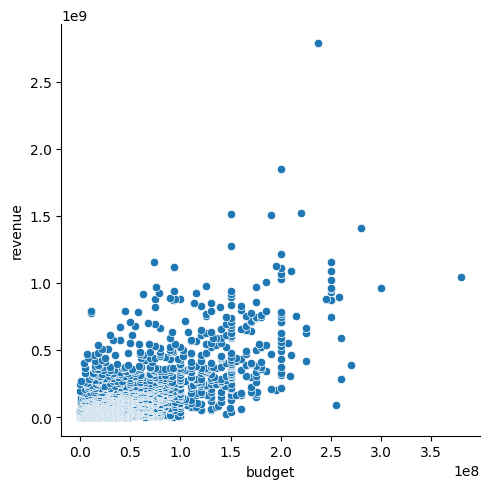

In [52]:
sns.relplot(movies_df, x="budget", y="revenue")

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

Create a new column called Profit

In [215]:
movies_df['Profit'] = '0'

movies_df



,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,Profit
3372,7,"['Thriller', 'Action', 'Horror', 'Science Fict...",13006,4.857028,['United Kingdom'],1992-05-01,5,90.0,['English'],Split Second,5.7,63,1992,0
3875,2000000,"['Romance', 'Drama']",108346,0.116150,"['United Kingdom', 'United States of America']",1999-10-29,7,92.0,['English'],Dreaming of Joseph Lees,8.0,1,1999,0
3419,7,"['Comedy', 'Drama', 'Foreign', 'Romance']",38415,0.050456,[],2009-08-09,7,82.0,[],Bran Nue Dae,5.2,6,2009,0
2933,11,"['Drama', 'Action']",28932,3.375208,['United States of America'],1978-04-26,11,145.0,['English'],F.I.S.T.,6.4,29,1978,0
3131,10,"['Drama', 'Romance', 'Comedy']",217708,1.617943,"['Norway', 'Iceland']",2013-08-30,11,85.0,"['English', 'Íslenska', 'Pусский', 'Español', ...",Of Horses and Men,6.9,26,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015,0
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015,0
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012,0
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997,0


In [216]:
movies_df['Profit'] = movies_df['revenue'] - movies_df['budget']
movies_df


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,Profit
3372,7,"['Thriller', 'Action', 'Horror', 'Science Fict...",13006,4.857028,['United Kingdom'],1992-05-01,5,90.0,['English'],Split Second,5.7,63,1992,-2
3875,2000000,"['Romance', 'Drama']",108346,0.116150,"['United Kingdom', 'United States of America']",1999-10-29,7,92.0,['English'],Dreaming of Joseph Lees,8.0,1,1999,-1999993
3419,7,"['Comedy', 'Drama', 'Foreign', 'Romance']",38415,0.050456,[],2009-08-09,7,82.0,[],Bran Nue Dae,5.2,6,2009,0
2933,11,"['Drama', 'Action']",28932,3.375208,['United States of America'],1978-04-26,11,145.0,['English'],F.I.S.T.,6.4,29,1978,0
3131,10,"['Drama', 'Romance', 'Comedy']",217708,1.617943,"['Norway', 'Iceland']",2013-08-30,11,85.0,"['English', 'Íslenska', 'Pусский', 'Español', ...",Of Horses and Men,6.9,26,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015,1316249360
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015,1363528810
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012,1299557910
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997,1645034188


### What is the highest profit movie?


In [217]:
movies_df[['title', 'Profit', 'year']].sort_values('Profit', ascending=False).head(10)



,title,Profit,year
0,Avatar,2550965087,2009
25,Titanic,1645034188,1997
28,Jurassic World,1363528810,2015
44,Furious 7,1316249360,2015
16,The Avengers,1299557910,2012
7,Avengers: Age of Ultron,1125403694,2015
124,Frozen,1124219009,2013
546,Minions,1082730962,2015
329,The Lord of the Rings: The Return of the King,1024888979,2003
31,Iron Man 3,1015439994,2013


Avatar is the movie with the highest profit of 2.55 billon

### What is the lowest profit movie?

In [218]:
movies_df[['title', 'Profit', 'year']].sort_values('Profit', ascending=True).head(10)

,title,Profit,year
13,The Lone Ranger,-165710090,2013
338,The Alamo,-119180039,2004
141,Mars Needs Moms,-111007242,2011
208,The 13th Warrior,-98301101,1999
311,The Adventures of Pluto Nash,-92896027,2002
2638,Metropolis,-91969578,1927
340,Cutthroat Island,-87982678,1995
142,Flushed Away,-84540684,2006
192,Australia,-80445998,2008
272,Town & Country,-79627709,2001


The Lone Ranger is the movie with the lowest profit of -165 million

What is the average profit based on the title?

In [132]:
print("The average profit based on title is as follows: \n", movies_df.groupby("title")["Profit"].mean())


The average profit based on title is as follows: 
 title
(500) Days of Summer           53222734.0
10 Cloverfield Lane            93286421.0
10 Things I Hate About You     37478166.0
102 Dalmatians                 98611771.0
10th & Wolf                    -7856549.0
                                 ...     
[REC]²                         12869680.0
eXistenZ                      -12143288.0
xXx                           207448382.0
xXx: State of the Union        11073932.0
Æon Flux                       -9695999.0
Name: Profit, Length: 3226, dtype: float64


Visualisation below to show a strong correlation between the movie budget and revenue = a good profit 

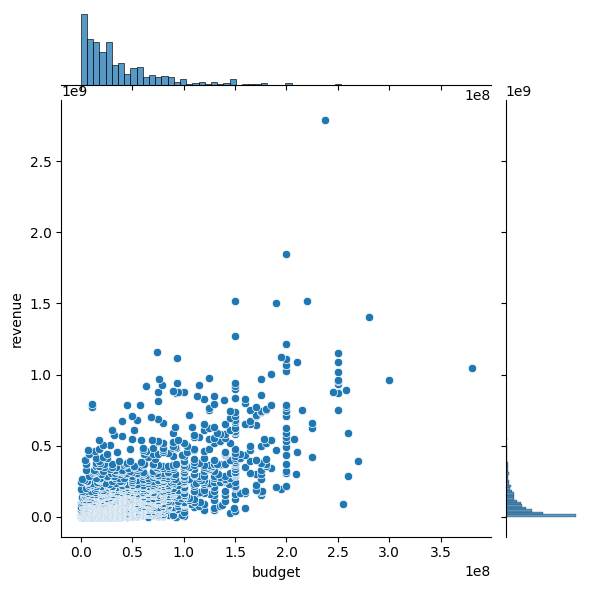

In [75]:
sns.jointplot(x='budget',y='revenue',data=movies_df[movies_df['Profit'].notnull()])

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



Most Popular Movies by Popularity Score

In [219]:
movies_df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)



,title,popularity,year
546,Minions,875.581305,2015
95,Interstellar,724.247784,2014
788,Deadpool,514.569956,2016
94,Guardians of the Galaxy,481.098624,2014
127,Mad Max: Fury Road,434.278564,2015
28,Jurassic World,418.708552,2015
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003
82,Dawn of the Planet of the Apes,243.791743,2014
200,The Hunger Games: Mockingjay - Part 1,206.227151,2014
88,Big Hero 6,203.734590,2014


Minions is the most popular movie by the Popularity Score. Wonder Woman and Beauty and the Beast, two extremely successful woman centred movies come in second and third places.

Most Voted on Movies

In [82]:
movies_df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
96,Inception,13752,2010
65,The Dark Knight,12002,2008
0,Avatar,11800,2009
16,The Avengers,11776,2012
788,Deadpool,10995,2016
95,Interstellar,10867,2014
287,Django Unchained,10099,2012
94,Guardians of the Galaxy,9742,2014
426,The Hunger Games,9455,2012
127,Mad Max: Fury Road,9427,2015


Inception and The Dark Knight, two critically acclaimed movies feature at the top.

Vote average summary

In [85]:
movies_df['vote_average'] = movies_df['vote_average'].replace(0, np.nan)
movies_df['vote_average'].describe()

count    3224.000000
mean        6.313027
std         0.860192
min         2.300000
25%         5.800000
50%         6.300000
75%         6.900000
max         8.500000
Name: vote_average, dtype: float64

In [91]:
movies_df[['title', 'vote_average', 'year']].sort_values('vote_average', ascending=False).head(700)

,title,vote_average,year
1881,The Shawshank Redemption,8.5,1994
2970,There Goes My Baby,8.5,1994
3337,The Godfather,8.4,1972
2294,Spirited Away,8.3,2001
3865,Whiplash,8.3,2014
...,...,...,...
3084,A Better Life,7.0,2011
3155,Melancholia,7.0,2011
3034,Mud,7.0,2013
3225,Limbo,7.0,1999


Displot to show vote_average

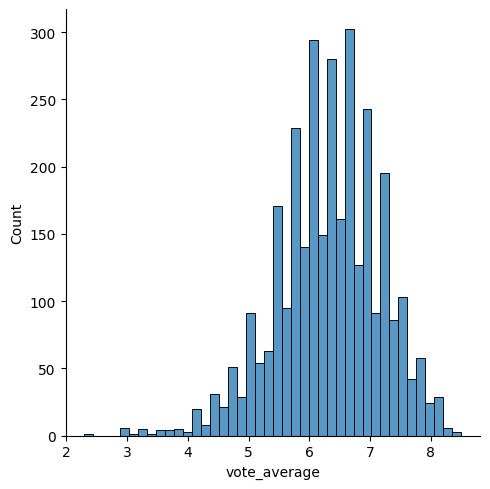

In [174]:
sns.displot(movies_df['vote_average'].fillna(movies_df['vote_average'].median()))

Let's find the movie with the highest vote average

In [220]:
movies_df[movies_df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
1881,The Shawshank Redemption,8.5,8205,1994
3337,The Godfather,8.4,5893,1972
2294,Spirited Away,8.3,3840,2001
1818,Schindler's List,8.3,4329,1993
3865,Whiplash,8.3,4254,2014
3232,Pulp Fiction,8.3,8428,1994
662,Fight Club,8.3,9413,1999
2731,The Godfather: Part II,8.3,3338,1974
4602,12 Angry Men,8.2,2078,1957
1847,GoodFellas,8.2,3128,1990


The Shawshank Redemption has the highest 8.5 vote average in our dataframe

#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

Number of movies produced by year

<Axes: xlabel='year'>

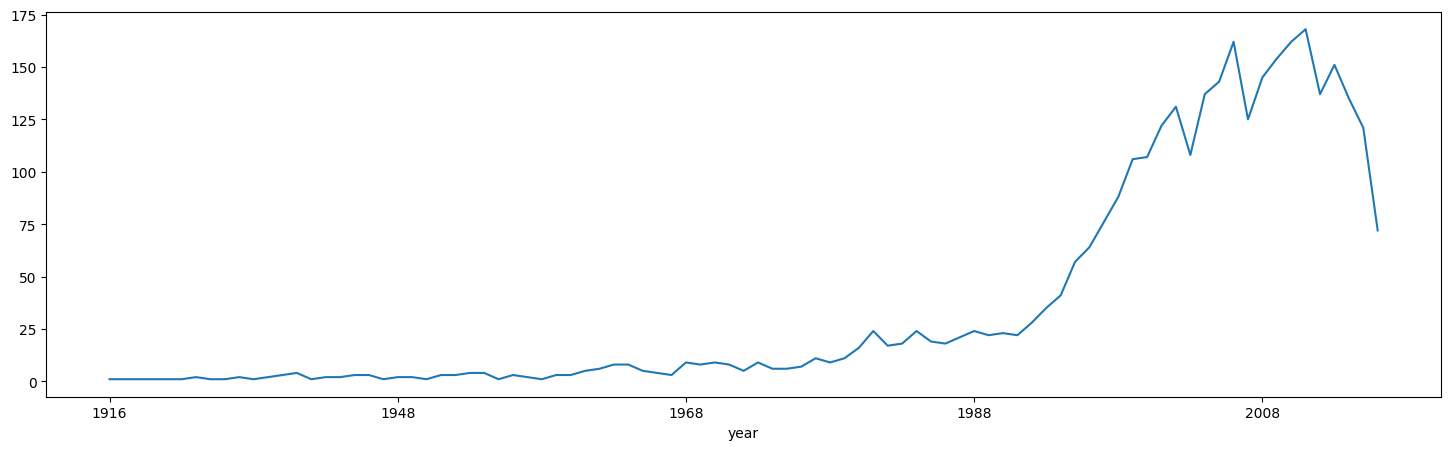

In [93]:
year_count = movies_df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

We notice that there is a sharp rise in the number of movies starting the 1990s. Wondering why this maybe the case?

Now I want to find out the earliest movies by year in our dataframe

In [129]:
movies_df[movies_df['year'] != 'NaT'][['title', 'year']].sort_values('year').head(10)

,title,year
4592,Intolerance,1916
4661,The Big Parade,1925
2638,Metropolis,1927
4594,The Broadway Melody,1929
3804,Hell's Angels,1930
3611,A Farewell to Arms,1932
4570,42nd Street,1933
4673,She Done Him Wrong,1933
4604,It Happened One Night,1934
4495,Top Hat,1935


Now lets look at year where movies made the most profit 

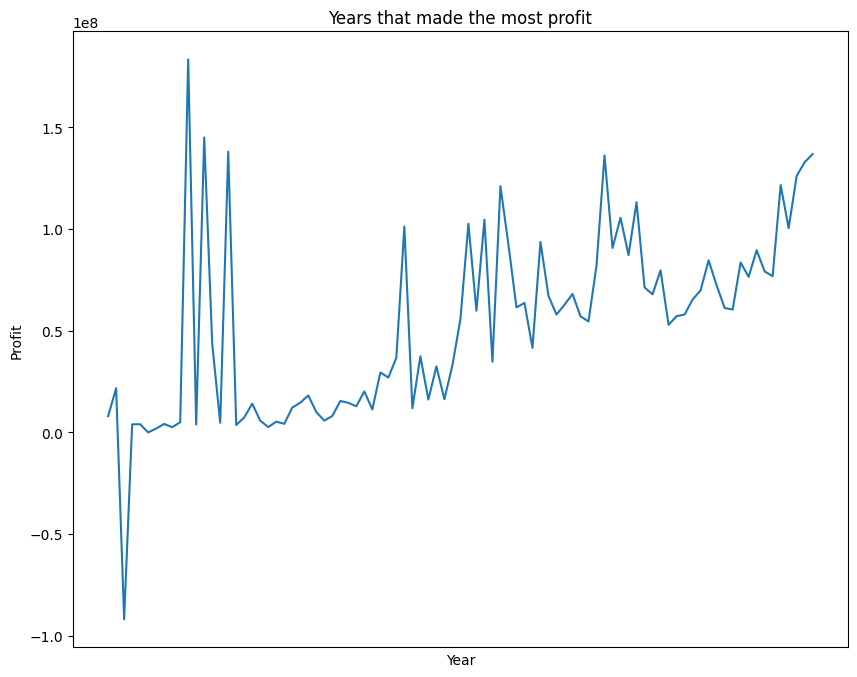

In [196]:
plt.figure(figsize=(10,8))
year_profit = movies_df[movies_df['year'] != 'NaT'].groupby('year')['Profit'].mean()
plt.plot(year_profit.index, year_profit)
plt.xticks(np.arange(1916, 12.0))
plt.title("Years that made the most profit")
plt.ylabel('Profit')
plt.xlabel('Year');
plt.show()

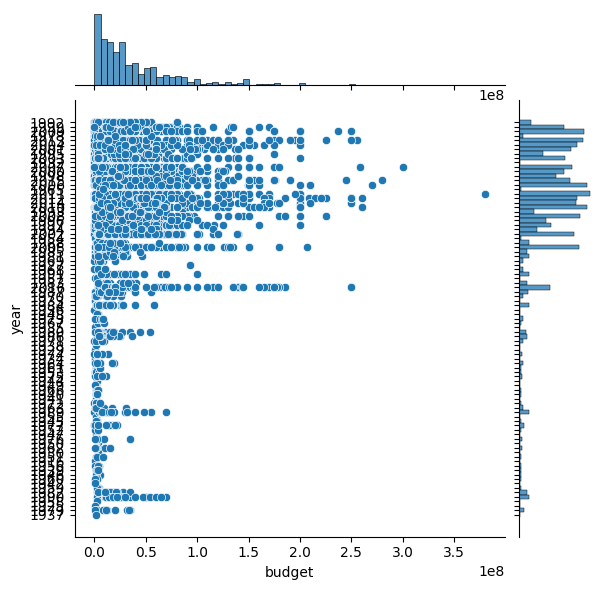

In [99]:
sns.jointplot(x='budget',y='year',data=movies_df[movies_df['Profit'].notnull()])



#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [224]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,['Drama'],204
1,['Comedy'],197
2,"['Drama', 'Romance']",96
3,"['Comedy', 'Romance']",87
4,"['Comedy', 'Drama']",70
5,"['Comedy', 'Drama', 'Romance']",63
6,"['Horror', 'Thriller']",61
7,['Horror'],36
8,"['Drama', 'Thriller']",35
9,"['Action', 'Thriller']",32


The top 3 movie genres are Drama, comedy and drama Romance, now lets see how they look in a bar plot.

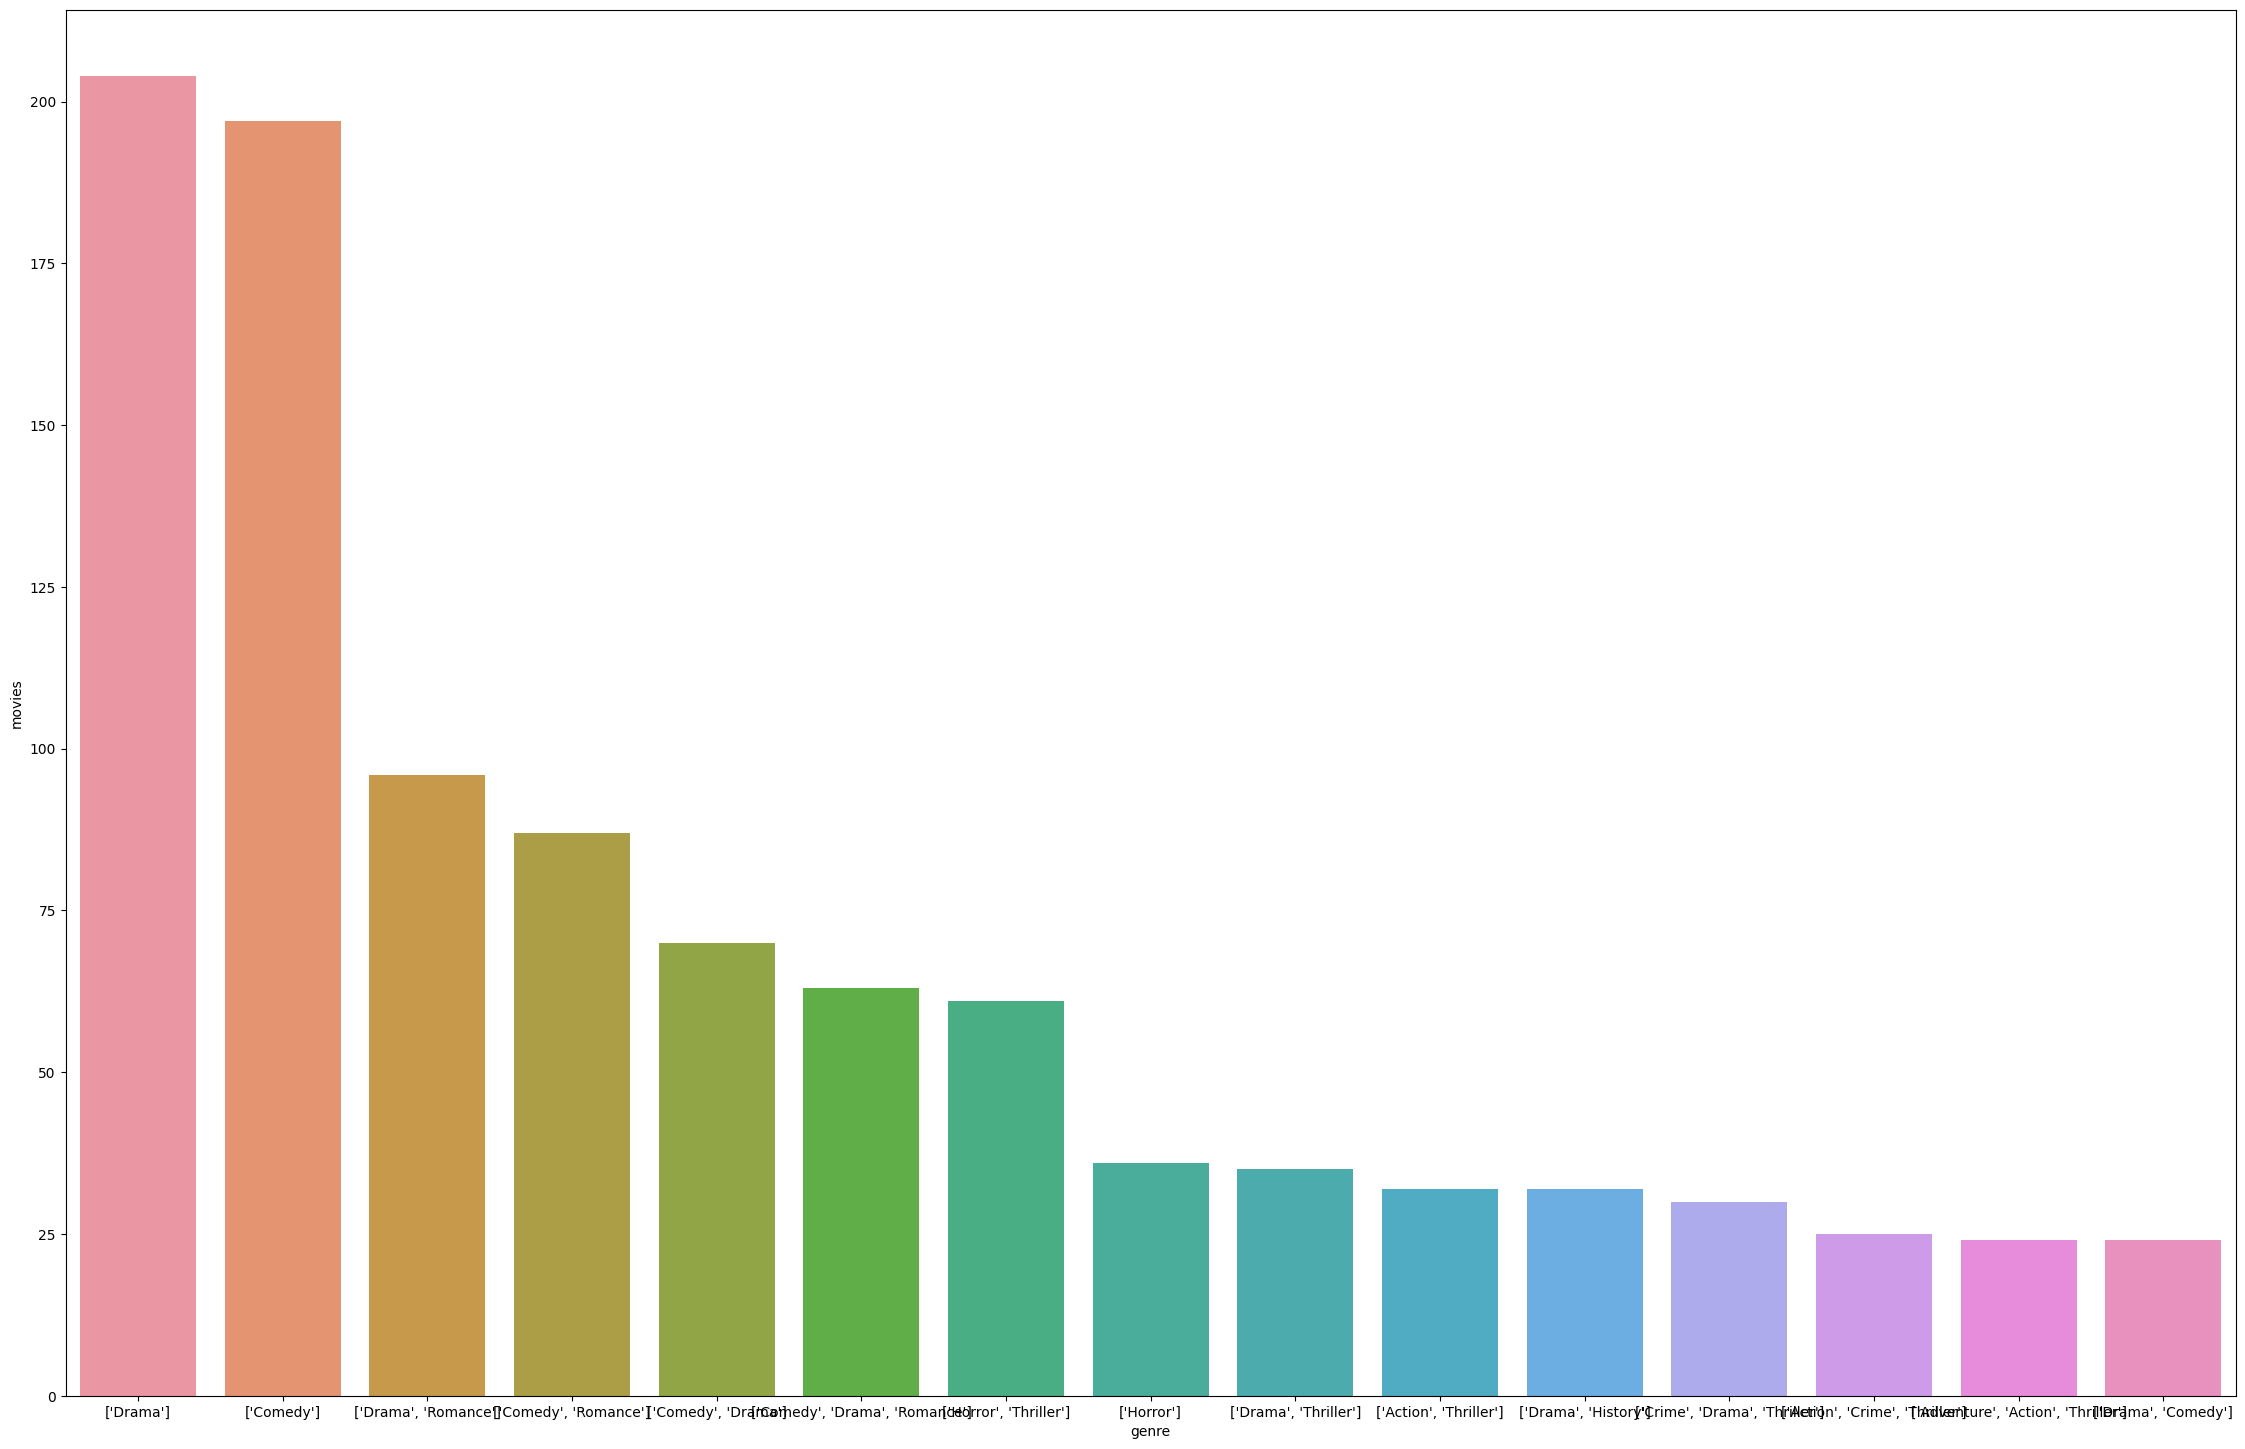

In [228]:
plt.figure(figsize=(28,18))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

This bar plot shows the top 3 movie genres as drama, comedy and drama romance in a much more visual way. These 3 particular genres account for a large proportion of movies in our data frame.

#### Generate three different interesting visualisations with a data story.

Length of a movie using displot

<Figure size 1800x400 with 0 Axes>

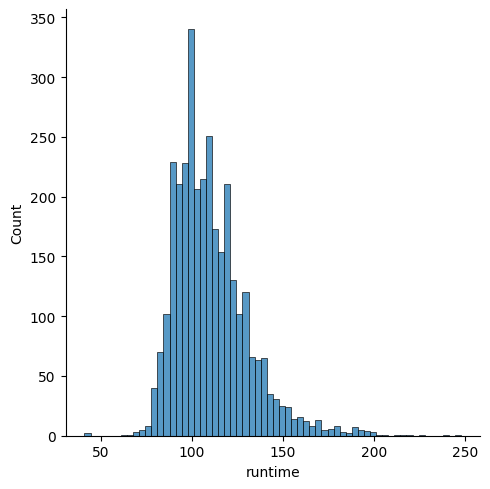

In [181]:
plt.figure(figsize=(18,4))
sns.displot(movies_df[(movies_df['runtime'] < 300) & (movies_df['runtime'] > 0)]['runtime'])

This shows a distribution of around 110 minutes runtime for the data frame 

Lets compare runtime and profit below

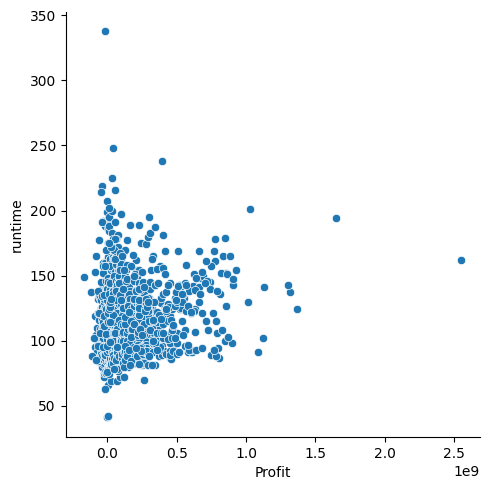

In [187]:
sns.relplot(movies_df, x="Profit", y="runtime")

There does seem to be a connection between runtime and Profit as the plots suggest an upward trend

Length of movies runtime by year

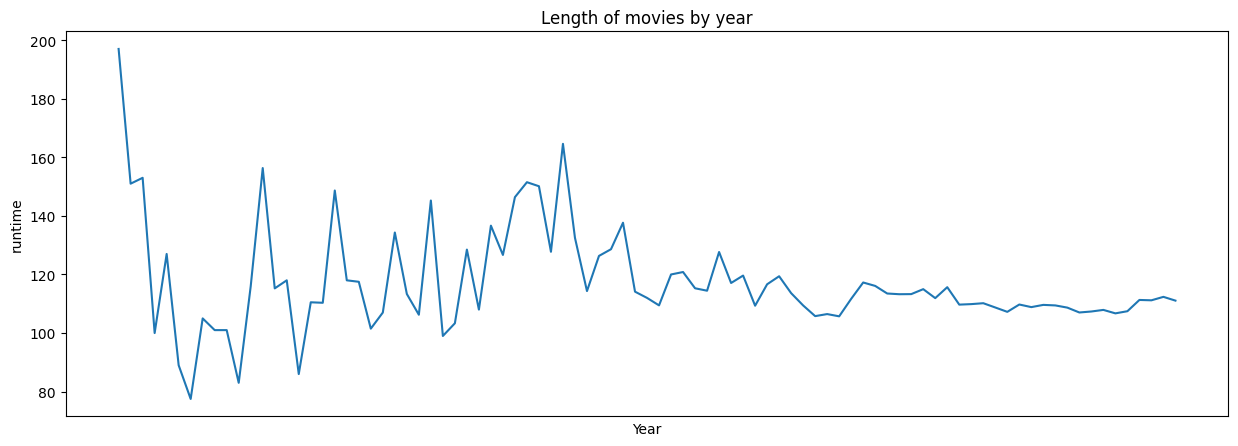

In [238]:
plt.figure(figsize=(15,5))
year_runtime = movies_df[movies_df['year'] != 'NaT'].groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(np.arange(1916, 20.0))
plt.title("Length of movies by year")
plt.ylabel('runtime')
plt.xlabel('Year');
plt.show()

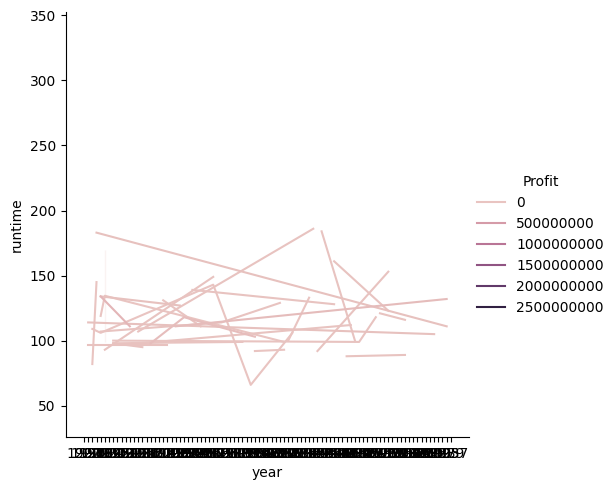

In [194]:
sns.relplot(data=movies_df, x="year", y="runtime", hue="Profit", kind="line")

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)